In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("./data/ratings.csv")
movie_titles = pd.read_csv('./data/movies_titles.csv') 
df['item_id'] = df['movieId']
df = df.drop('movieId', axis = 1)
movielens = pd.merge(df, movie_titles, on='item_id') 

movielens.head(5)

In [6]:
movielens

,userId,rating,timestamp,item_id,title
0,1,2.5,1260759144,31,Crimson Tide (1995)
1,7,3.0,851868750,31,Crimson Tide (1995)
2,31,4.0,1273541953,31,Crimson Tide (1995)
3,32,4.0,834828440,31,Crimson Tide (1995)
4,36,3.0,847057202,31,Crimson Tide (1995)
...,...,...,...,...,...
39824,641,4.0,850021377,638,"Return of Martin Guerre, The (Retour de Martin..."
39825,647,3.0,947292322,245,"Devil's Own, The (1997)"
39826,659,4.0,836137550,167,Private Benjamin (1980)
39827,659,3.0,834694187,563,Stephen King's The Langoliers (1995)


In [8]:
# Средний рейтинг фильмов
movielens.groupby('title')['rating'].mean().sort_values(ascending=False).head() 

title
Promise, The (Versprechen, Das) (1994)    5.0
Fair Game (1995)                          5.0
Pompatus of Love, The (1996)              5.0
Love Jones (1997)                         5.0
That Thing You Do! (1996)                 5.0
Name: rating, dtype: float64

In [9]:
# Кол-во рейтингов на фильм
movielens.groupby('title')['rating'].count().sort_values(ascending=False).head() 

title
Client, The (1994)         341
Promesse, La (1996)        324
Schindler's List (1993)    311
Stalingrad (1993)          304
Event Horizon (1997)       291
Name: rating, dtype: int64

In [15]:
ratings = movielens.groupby('title',as_index =False).agg(num_of_ratings = ('rating','count'), rating = ('rating','mean'))
ratings

,title,num_of_ratings,rating
0,'Til There Was You (1997),19,4.052632
1,1-900 (1994),13,2.961538
2,101 Dalmatians (1996),52,3.173077
3,12 Angry Men (1957),5,4.700000
4,187 (1997),10,2.700000
...,...,...,...
1319,Young Guns II (1990),34,3.397059
1320,"Young Poisoner's Handbook, The (1995)",5,3.000000
1321,Zeus and Roxanne (1997),1,1.000000
1322,unknown,13,2.730769


<Axes: title={'center': 'Number of ratings'}>

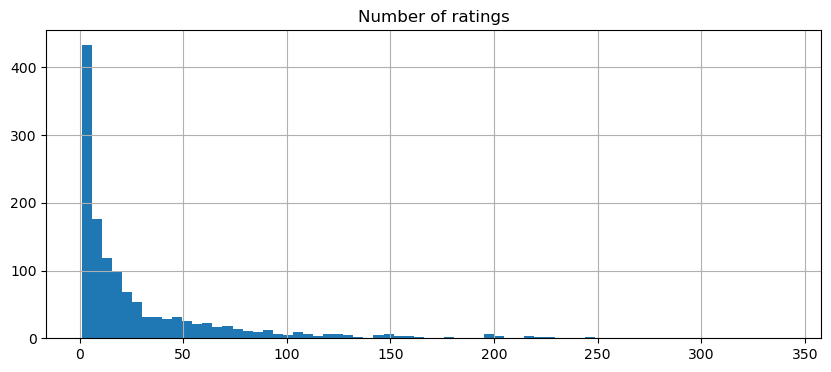

In [16]:
# визуализация по  кол-ву рейтингов
plt.figure(figsize =(10, 4)) 
plt.title("Number of ratings")
ratings['num_of_ratings'].hist(bins = 70) 

<Axes: title={'center': 'Ratings'}>

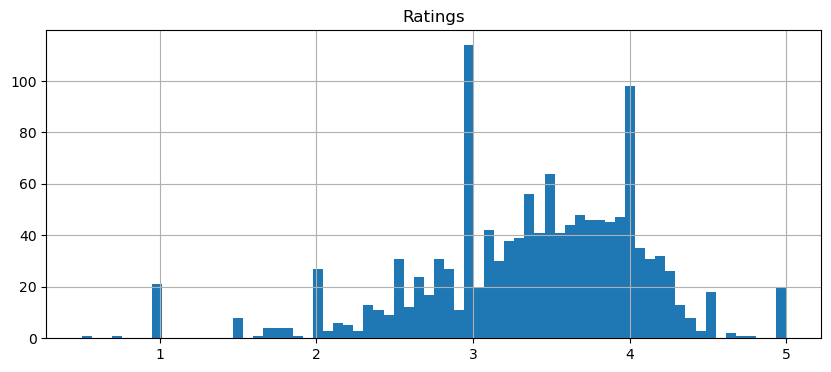

In [17]:
# визуализация по размеру рейтинга
plt.figure(figsize =(10, 4)) 
plt.title("Ratings")  
ratings['rating'].hist(bins = 70) 

In [24]:
ratings.sort_values('num_of_ratings',ascending = False)

,title,num_of_ratings,rating
257,"Client, The (1994)",341,4.054252
956,"Promesse, La (1996)",324,4.256173
1027,Schindler's List (1993),311,4.487138
1113,Stalingrad (1993),304,4.138158
385,Event Horizon (1997),291,4.221649
...,...,...,...
224,Carrie (1976),1,4.000000
229,Cat on a Hot Tin Roof (1958),1,3.000000
230,Caught (1996),1,3.000000
87,August (1996),1,1.000000


In [25]:
# Сортируем по кол-ву рейтингов на фильм
moviemat = movielens.pivot_table(index ='userId', columns ='title', values ='rating') 

# Корреляция 1 to Many

In [29]:
# корреляция между фильмами
starwars_user_ratings = moviemat['Star Wars (1977)'] 
# liarliar_user_ratings = moviemat['Liar Liar (1997)'] 
  
# применим метод расчета корреляции
similar_to_starwars = moviemat.corrwith(starwars_user_ratings) 
# similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings) 

C:\Users\artem\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\artem\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [60]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation']) 
corr_starwars.dropna(inplace = True)

In [68]:

corr_starwars.head() 

,Correlation
title,
Grease (1978),1.0
Star Wars (1977),1.0
Balto (1995),1.0
My Best Friend's Wedding (1997),1.0
Executive Decision (1996),1.0


In [66]:
# поиск похожих фильмов на Star Wars (1977)
corr_starwars = corr_starwars.sort_values('Correlation', ascending = False)

In [76]:
df = corr_starwars.merge(ratings, how = 'left', on='title')

In [81]:
df[df.num_of_ratings>100].sort_values(by='Correlation', ascending = False)

,title,Correlation,num_of_ratings,rating
1,Star Wars (1977),1.000000,201,4.370647
174,Mortal Kombat (1995),0.558721,146,4.037671
277,"Savage Nights (Nuits fauves, Les) (1992)",0.392853,234,4.232906
302,Virtuosity (1995),0.369193,217,4.059908
330,Sling Blade (1996),0.341309,109,3.963303
...,...,...,...,...
786,"Apostle, The (1997)",-0.098590,175,2.871429
791,Swingers (1996),-0.105080,200,3.902500
800,Scream (1996),-0.121075,107,3.336449
802,Young Frankenstein (1974),-0.122601,113,2.752212


In [83]:
starwars_user_ratings

userId
1      NaN
2      4.0
3      NaN
4      NaN
5      NaN
      ... 
667    NaN
668    NaN
669    NaN
670    5.0
671    4.5
Name: Star Wars (1977), Length: 669, dtype: float64